### Exploration of the Ford GoBike Dataset!

In this investigation I looked at the GoBike dataset, available on their website and tried to find some interesting, not so obvious and surprising insights from their data. 

In [77]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats

%matplotlib inline 

### Importing the data

The downloaded csv files are kept in a single folder now, let's combine the multiple csvs into a single dataframe before we start the EDA.

In [78]:
def get_all_csvs():
    path = 'dataset'
    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.csv' in file:
                files.append(os.path.join(r, file))
    return files

In [79]:
df = pd.read_csv(get_all_csvs()[0])
for csv in get_all_csvs()[1:]:
    print("Reading ",csv)
    df.append(pd.read_csv(csv), ignore_index = True)
df.shape
df_orignal = df.copy()

Reading  dataset\201802-fordgobike-tripdata.csv
Reading  dataset\201803-fordgobike-tripdata.csv
Reading  dataset\201804-fordgobike-tripdata.csv
Reading  dataset\201805-fordgobike-tripdata.csv
Reading  dataset\201807-fordgobike-tripdata.csv
Reading  dataset\201808-fordgobike-tripdata.csv
Reading  dataset\201809-fordgobike-tripdata.csv
Reading  dataset\201810-fordgobike-tripdata.csv
Reading  dataset\201811-fordgobike-tripdata.csv
Reading  dataset\201812-fordgobike-tripdata.csv
Reading  dataset\201901-fordgobike-tripdata.csv
Reading  dataset\201902-fordgobike-tripdata.csv
Reading  dataset\201903-fordgobike-tripdata.csv
Reading  dataset\201904-fordgobike-tripdata.csv
Reading  dataset\201906-baywheels-tripdata.csv
Reading  dataset\201907-baywheels-tripdata.csv


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


###  Our data is loaded successfully!

In [81]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


### Wrangling

Let's do a little bit of wrangling, the data is already pretty clean but let's make it better.

#### Converting the ride duration to minutes

In [82]:
df['duration_minu'] = df.duration_sec / 60

Test

In [83]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_minu
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male,7.250000
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male,7.183333
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female,7.066667
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male,6.100000
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male,3.133333


#### Converting the brith year to age

In [84]:
df['member_age'] = 2019 - df.member_birth_year

Test

In [85]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_minu,member_age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,32.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,54.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,22.0


#### Let's drop redundant columns from the dataset

In [86]:
df.drop(columns = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 
                   'end_station_name', 'end_station_latitude', 'end_station_longitude',
                   'duration_sec','member_birth_year'], inplace=True)

Test

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 9 columns):
start_time          519700 non-null object
end_time            519700 non-null object
start_station_id    519700 non-null int64
end_station_id      519700 non-null int64
bike_id             519700 non-null int64
user_type           519700 non-null object
member_gender       453238 non-null object
duration_minu       519700 non-null float64
member_age          453159 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 35.7+ MB


##### Drop nan items from the the dataset.

In [88]:
df.dropna(inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
start_time          453159 non-null object
end_time            453159 non-null object
start_station_id    453159 non-null int64
end_station_id      453159 non-null int64
bike_id             453159 non-null int64
user_type           453159 non-null object
member_gender       453159 non-null object
duration_minu       453159 non-null float64
member_age          453159 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 34.6+ MB


#### Fix datatypes

In [90]:
df.member_age = df.member_age.astype(int)
df.start_time = df.start_time.astype('datetime64[ns]') 
df.end_time = df.end_time.astype('datetime64[ns]') 

In [91]:
df.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,duration_minu,member_age
0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,43,96,Customer,Male,1335.166667,32
1,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,96,88,Customer,Female,1313.333333,54
4,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,247,3167,Subscriber,Female,726.716667,22
6,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,259,3539,Customer,Female,75.116667,28
12,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,24,2311,Subscriber,Male,36.383333,29


##### Let's convert user_type to boolean

In [92]:
df['member_subscriber'] = df.user_type
df.replace({'member_subscriber': {'Subscriber': 0, 'Customer': 1}}, inplace=True)

#### Let's convert member_gender to an encoded variable

In [93]:
df['member_gender_orgin'] = df.member_gender
df['member_gender'] = df.member_gender
df.replace({'member_gender': {'Male': 0, 'Female': 1, 'Other': 2}}, inplace=True)
df.member_gender = df.member_gender.astype(int)

In [94]:
df.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,duration_minu,member_age,member_subscriber,member_gender_orgin
0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,43,96,Customer,0,1335.166667,32,1,Male
1,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,96,88,Customer,1,1313.333333,54,1,Female
4,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,247,3167,Subscriber,1,726.716667,22,0,Female
6,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,259,3539,Customer,1,75.116667,28,1,Female
12,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,24,2311,Subscriber,0,36.383333,29,0,Male


### EDA!

Now, let's get started with the EDA.

## Dataset overview
#### How is the data structured?

After cleaning the data has about 450000 rows and 11 columns, including but not limited to - age of the rider, gender, duration, and start and end points of the ride. 


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 11 columns):
start_time             453159 non-null datetime64[ns]
end_time               453159 non-null datetime64[ns]
start_station_id       453159 non-null int64
end_station_id         453159 non-null int64
bike_id                453159 non-null int64
user_type              453159 non-null object
member_gender          453159 non-null int32
duration_minu          453159 non-null float64
member_age             453159 non-null int32
member_subscriber      453159 non-null int64
member_gender_orgin    453159 non-null object
dtypes: datetime64[ns](2), float64(1), int32(2), int64(4), object(2)
memory usage: 38.0+ MB


In [96]:
df.describe()

,start_station_id,end_station_id,bike_id,member_gender,duration_minu,member_age,member_subscriber
count,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000,453159.000000
mean,95.046132,91.854907,1680.628285,0.245256,13.882234,38.595213,0.107545
std,84.578497,83.053529,972.828314,0.461418,42.088012,10.513488,0.309805
min,3.000000,3.000000,10.000000,0.000000,1.016667,20.000000,0.000000
25%,25.000000,24.000000,795.000000,0.000000,6.066667,31.000000,0.000000
50%,67.000000,66.000000,1739.000000,0.000000,9.266667,36.000000,0.000000
75%,138.000000,134.000000,2530.000000,0.000000,13.966667,45.000000,0.000000
max,340.000000,340.000000,3733.000000,2.000000,1437.533333,133.000000,1.000000


##### How many user_type present?

In [97]:
df.user_type.value_counts()

Subscriber    404424
Customer       48735
Name: user_type, dtype: int64

##### How many genders are there?

In [98]:
df.member_gender.value_counts()

0    348318
1     98542
2      6299
Name: member_gender, dtype: int64

## Univariate Exploration

### What does the age distribution of the audience look like?

From the graph we are able to understand that people in their early 30s are more likely to use the bike sharing app.

People in their early 30s are generally financially stable and hence are more likely to opt in for a subsription. This also means that the sales team could use this value to optimize their pricing.

#### The most common age is 34, the average age is 38. 

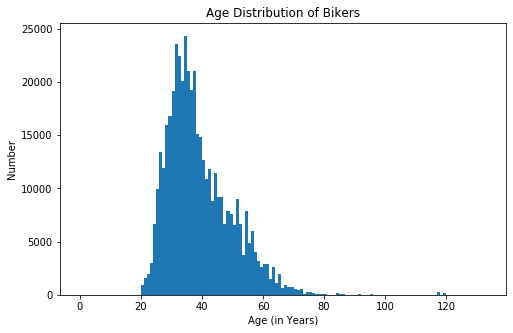

In [99]:
binsize = 1
bins = np.arange(0, df['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_age', bins = bins)
plt.xlabel('Age (in Years)')
plt.ylabel('Number')
plt.title('Age Distribution of Bikers')
plt.show()

In [100]:
df.member_age.describe()

count    453159.000000
mean         38.595213
std          10.513488
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         133.000000
Name: member_age, dtype: float64

In [101]:
df.member_age.mode()

0    34
dtype: int32

This value again surprised me, I would have assumed 20-something's might have been the mode.

##  Bivariate Exploration

### Is there a relationship between the age of the user and the ride duration?

Yes! there does seem to be a positive coorelation betweeen the age of the rider and the duration of the rides taken by them.

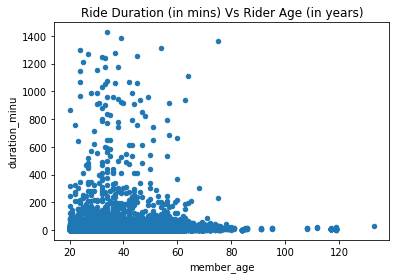

In [102]:
df.sample(50000).plot.scatter(x='member_age',y='duration_minu', title="Ride Duration (in mins) Vs Rider Age (in years)");

### How does the gender distribution look like for all members?

From the data we can conclude that more men are likely to try the bikes. 

Why? I guess this might be due to the fact the men usually wear pants and Shirts or T-Shirts, which make it easy for them to ride bikes. Women on the other hand might prefer to wear long dresses, skirts and other types of clothes which might make it difficult for them the to use the bikes. 

Maybe, women just prefer to take the car or the bus. 🤷🏽‍♀️

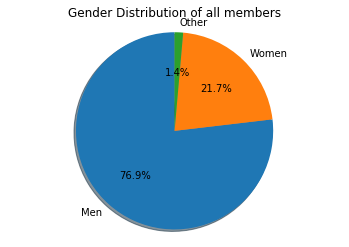

In [103]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Men', 'Women', 'Other'
sizes = [(df['member_gender']==0).sum(), (df['member_gender']==1).sum(),(df['member_gender']==2).sum()]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Distribution of all members")
plt.show()

### How does the gender distribution look like for subscribers?

Though the number of men are more who are regular users, women amount to about 31% of the total number of subscribers. This means women are about 1/3 more likely to opt for the subscription as compared to men.

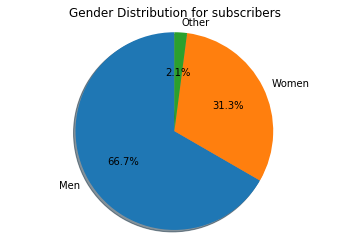

In [104]:
labels = 'Men', 'Women', 'Other'
sizes = [df.query('member_gender == 0 & member_subscriber == True').sum()[0],
         df.query('member_gender == 1 & member_subscriber == True').sum()[0],
         df.query('member_gender == 2 & member_subscriber == True').sum()[0]]
explode = (0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Gender Distribution for subscribers")
plt.show()

### Coorelations in the data
Now, let's look at some pairwise correlations present between features in the data.

From the charts given below we can conclude that, there might be a coorelation between the duration of rides, the number of rides and the age group of the rider.


In [105]:
numeric_vars = ['duration_minu','member_age',]
categoric_vars = ['member_gender']

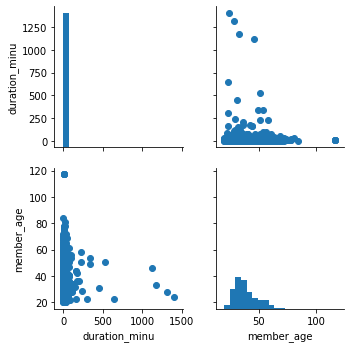

In [106]:
samples = np.random.choice(df.shape[0], 5000, replace = False)
diamonds_samp = df.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


### Is there a difference between the riding habits of subscribers and customers?

Yes, it seems that subscribers tend to use the bikes for longer amount of time than the customers. This is because the pricing of GoBikes allows subscribers to have unlimited number of rides for 15$!

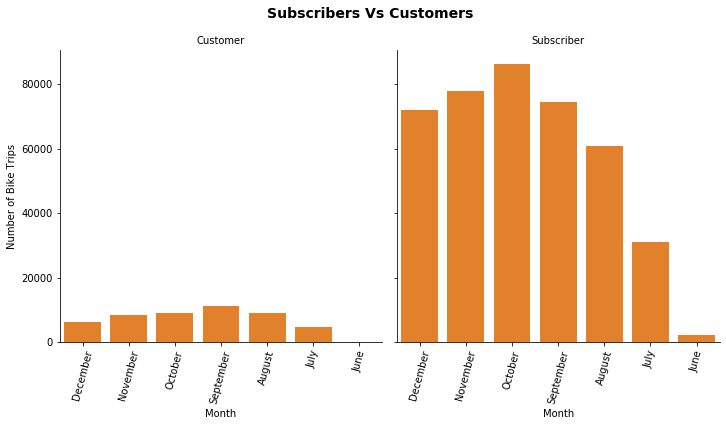

In [107]:
df['start_time_month'] = df['start_time'].dt.strftime('%B')
graph = sb.catplot(data=df, x='start_time_month', col="user_type", kind='count', sharey = True, color = sb.color_palette()[1]);
graph.set_axis_labels("Month", "Number of Bike Trips");
graph.fig.suptitle('Subscribers Vs Customers', y=1.05, fontsize=14, fontweight='bold');
graph.set_xticklabels(rotation=75);
graph.set_titles("{col_name}");

## Multivariate Exploration

Now, let's move to some multivariate relations. I am really curious to see how the time of the year, the user type and the gender of the members compare with one another.

###  Does a specific age group / gender go for rides longer than the others?

From the visualizations we can derive the conclusion that women between 20-40 are more likely to go on longer biking trips than any other group.
This is an interesting observation, but I can't really find a specific reason for this. 

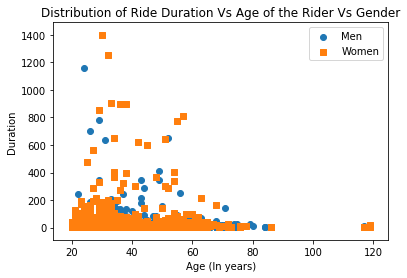

In [108]:
markers = [[0, 'o'],
           [1, 's']]

for c, marker in markers:
    df_cat = df[df['member_gender'] == c]
    plt.scatter(data = df_cat.sample(5000), x = 'member_age', y = 'duration_minu', marker = marker);
plt.legend(['Men','Women']);
plt.xlabel("Age (In years)");
plt.ylabel("Duration");
plt.title("Distribution of Ride Duration Vs Age of the Rider Vs Gender");

### Which type of trips are more common, per gender per user type?

From the data we understand that round trips are less common by factor of 10! If it were upto me I would have thought this would have been the other way round.
This means, customers are more likely to go from point A-B on their bikes and hence, having more number of stations for the bikes can be useful.

In [109]:
df['round_trip'] = df['start_station_id'] == df['end_station_id']
df['round_trip'].replace({True:'Round Trip',
                         False:'One-Way'}, inplace=True)

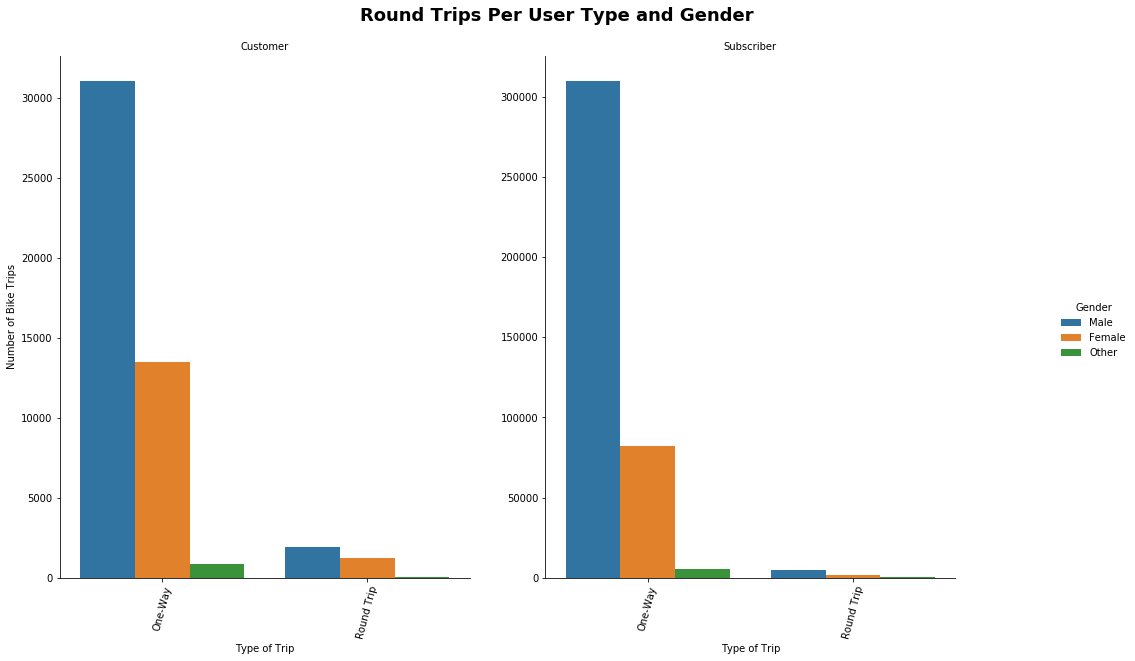

In [110]:
# Monthly usage - user type and gender

graph = sb.catplot(data=df, x='round_trip', col="user_type", hue="member_gender_orgin", kind='count', sharey = False, height=10, aspect=0.5);
graph.set_axis_labels('Type of Trip', "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")
graph.fig.set_size_inches( 16, 8)
graph.fig.suptitle('Round Trips Per User Type and Gender', y=1.05, fontsize=18, fontweight='bold');
graph.set_xticklabels(rotation=75);

 ### Is there a relation between the month of the year and the total number bikers? How is it distributed across different genders?
 
From the visualizations we understand that the number of bikes is more in the Summer as biking is easier in these months, the distribution for all of the genders follows basically the same style, all of the genders are more likely to bike in the Summer.  

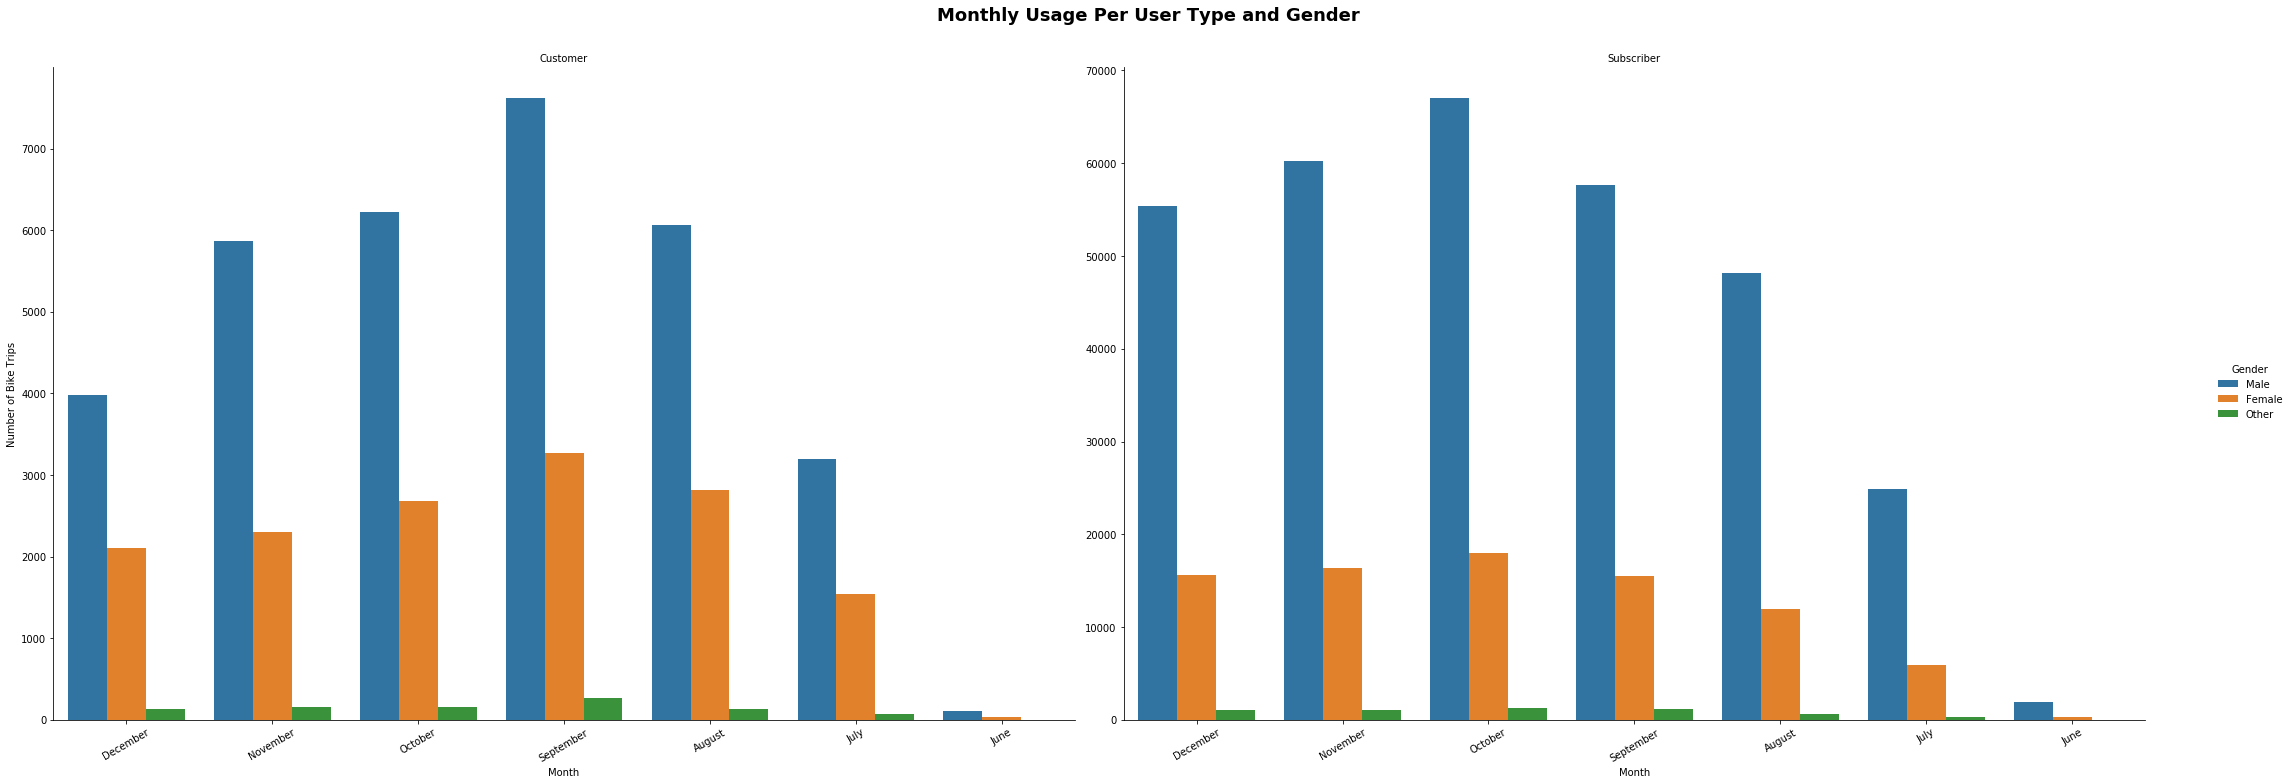

In [111]:
# Monthly usage - user type and gender
graph = sb.catplot(data=df, x='start_time_month', col="user_type", hue="member_gender_orgin", kind='count', sharey = False, height=10, aspect=1.5);
graph.set_axis_labels("Month", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_xticklabels(rotation=30);
graph.set_titles("{col_name}")
graph.fig.suptitle('Monthly Usage Per User Type and Gender', y=1.05, fontsize=18, fontweight='bold');

## Summary

Thus we understand that Go Bike is an excellent initiative and a great business endeavour. This is beneficial for both the environment and for the cusotmers who can easily use the bikes to commute small distances.

The startup also seems to be growing steadily through the years. 

We also understand from the data that -

* 20-35 year olds are the target audience for this startup
* Summer is the peak season for rides
* Round Trips are less common than point to point trips
* Women tend to take longer trip than any other gender
* Younger riders are more likely to take trips lasting a longer duration.

Another great thing is the fact that the company decided to open source their datasets, which allowed us to perform this analysis!